# Importação e instalação das bibliotecas

---


In [120]:
import pandas as pd
import spacy
import random
import numpy as np

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m spacy download pt_core_news_lg

# Carregamento da base de dados de Treino e Teste
---

In [168]:
base_treino = pd.read_csv('/content/TrainENEM.csv', delimiter = ';')
base_teste = pd.read_csv('/content/TestENEM.csv', delimiter = ';')

In [169]:
base_treino

,text,is_IA
0,O trabalho na construção da dignidade humana ...,1
1,O Trabalho na Construção da Dignidade Humana ...,1
2,Invisibilidade e Registro Civil: Garantindo o ...,1
3,O Trabalho na Construção da Dignidade Humana ...,1
4,O trabalho na construção da dignidade humana ...,1
5,Vida em Rede no Século XXI: Os Limites entre o...,1
6,Viver em rede no século XXI: os limites entre ...,1
7,A Invisibilidade e o Registro Civil: Garantind...,1
8,A Vida em Rede no Século XXI: Os Limites entre...,1
9,Viver em rede no século XXI: os limites entre ...,1


In [170]:
base_teste

,text,is_IA
0,A Construção da Dignidade Humana no Trabalho ...,1
1,O trabalho na construção da dignidade humana ...,1
2,A Construção da Dignidade Humana no Trabalho ...,1
3,O trabalho na construção da dignidade humana ...,1
4,O trabalho na construção da dignidade humana ...,1
5,Vivendo em Rede no Século XXI: Os Limites entr...,1
6,A vida em rede no século XXI: os limites entre...,1
7,Vida em Rede no Século XXI: Os Limites entre o...,1
8,Viver em rede no século XXI: os limites entre ...,1
9,Viver em rede no século XXI: os limites entre ...,1


# Pré-Processamento das Redações
---

In [171]:
pontuacoes = '!#$%&"”“()‘’’’*+,-./:;<=>?@[\]^_`{|}~'
from spacy.lang.pt.stop_words import STOP_WORDS
#stop_words = STOP_WORDS
stop_words = {'ter', 'o', 'a', 'de', 'da', 'do', 'um', 'uma', 'umas', 'dar', 'em', 'que', 'quais', 'e', 'como', 'ser', 'seu'}
pln = spacy.load('pt_core_news_lg')

### Função de pré-processamento

In [172]:
def preprocessamento(texto):
  texto = texto.lower()

  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista])

  return lista

In [173]:
base_treino['text'] = base_treino['text'].apply(preprocessamento)
base_teste['text'] = base_teste['text'].apply(preprocessamento)

In [174]:
base_treino

,text,is_IA
0,trabalho em o construção de o dignidade humano...,1
1,trabalho em o construção de o dignidade humano...,1
2,invisibilidade registro civil garantir acesso ...,1
3,trabalho em o construção de o dignidade humano...,1
4,trabalho em o construção de o dignidade humano...,1
5,vida rede em o século xxi limite entre público...,1
6,viver rede em o século xxi limite entre públic...,1
7,invisibilidade registro civil garantir acesso ...,1
8,vida rede em o século xxi limite entre público...,1
9,viver rede em o século xxi limite entre públic...,1


In [175]:
base_teste

,text,is_IA
0,construção de o dignidade humano em o trabalho...,1
1,trabalho em o construção de o dignidade humano...,1
2,construção de o dignidade humano em o trabalho...,1
3,trabalho em o construção de o dignidade humano...,1
4,trabalho em o construção de o dignidade humano...,1
5,viver rede em o século xxi limite entre públic...,1
6,vida rede em o século xxi limite entre público...,1
7,vida rede em o século xxi limite entre público...,1
8,viver rede em o século xxi limite entre públic...,1
9,viver rede em o século xxi limite entre públic...,1


# Tratamento da Classe
---

In [186]:
base_treino_final = []
for text, is_IA in zip(base_treino['text'], base_treino['is_IA']):
  if is_IA == 1:
    dic = ({'IA': True, 'HUMANO': False})
  elif is_IA == 0:
    dic = ({'IA': False, 'HUMANO': True})

  base_treino_final.append([text, dic.copy()])

In [187]:
base_treino_final

[['trabalho em o construção de o dignidade humano   dignidade humano princípio fundamental permeiar todo sociedade cultura ela se baseiar em o ideia todo humano possuir valor intrínseco inalienável independentemente origem raça gênero crença religioso ou status socioeconômico em esse contexto trabalho desempenhar papel crucial em o construção de o dignidade humano pois não apenas fornecer meio subsistência mas também contribuir para realização pessoal autoestima indivíduo este ensaio discutir importância de o trabalho em o construção de o dignidade humano apresentar argumento sustentar esse perspectiva   primeiro lugar essencial destacar trabalho proporcionar a o indivíduo oportunidade sustentar se mesmo família aspecto fundamental de o dignidade humano através de o trabalho pessoa poder adquirir recurso necessário para atender a o necessidade básico alimentação moradia cuidado saúde além de isso trabalho também permitir pessoa alcancem nível mínimo autonomia independência financeiro f

# Criação do Classificador
---

In [188]:
from spacy.training import Example

In [189]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("IA")
textcat.add_label("HUMANO")
historico = []

In [180]:
modelo.begin_training()
for epoca in range(200):
  random.shuffle(base_treino_final)
  losses = {}
  for batch in spacy.util.minibatch(base_treino_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 20 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.25}
{'textcat': 1.4145316526992247e-05}
{'textcat': 3.7584522299960454e-11}
{'textcat': 3.2382247924789276e-12}
{'textcat': 2.106166369780782e-12}
{'textcat': 1.862745851663461e-12}
{'textcat': 1.7212175695141552e-12}
{'textcat': 1.5942891538195392e-12}
{'textcat': 1.4677408594065966e-12}
{'textcat': 1.345006788236458e-12}


In [181]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [182]:
historico_loss = np.array(historico_loss)
historico_loss

array([2.50000000e-01, 1.41453165e-05, 3.75845223e-11, 3.23822479e-12,
       2.10616637e-12, 1.86274585e-12, 1.72121757e-12, 1.59428915e-12,
       1.46774086e-12, 1.34500679e-12])

Text(0, 0.5, 'Erro')

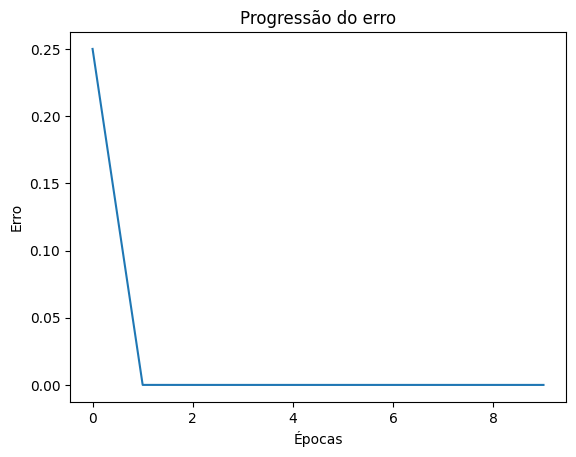

In [183]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [184]:
modelo.to_disk("modelo")

In [190]:
# Load the pre-trained model
modelo_carregado = spacy.load("/content/modelo")

# Avaliação na base de teste
---

In [191]:
previsoes = []
for texto in base_teste['text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [192]:
previsoes_final = []
for previsao in previsoes:
  if previsao['IA'] > previsao['HUMANO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [193]:
previsoes_final

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [194]:
respostas_reais = base_teste['is_IA'].values
respostas_reais

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final) * 100

97.82608695652173

In [196]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[23,  1],
       [ 0, 22]])

# BAG OF WORDS
---

In [140]:
texto = preprocessamento('Desafios de um país em desenvolvimento no contexto migratório contemporâneo A imigração, que sempre fez parte da história e da formação dos povos, tem se tornado um problema de difícil solução. Tanto os países desenvolvidos, como os países em desenvolvimento, como o Brasil, têm encontrado diversos obstáculos na tentativa de normalizar os fluxos migratórios, cada vez mais frequentes e preocupantes.Muitos são os motivos que levam milhões de pessoas ao redor do mundo a deixar seu país de origem, dentre os quais se destacam as crises econômicas, sociais e políticas, a exemplo da Venezuela, cujo governo nada tem feito para mudar a situação precária em que se encontra o país, tornando o crescente êxodo de seus habitantes insustentável para os países vizinhos.Em que pese à a necessidade de acolher de forma digna e humanitária os imigrantes que buscam melhores condições de vida, o Brasil tem revelado nos últimos meses insuficiência de infraestrutura e de recursos financeiros para garantir segurança e qualidade de vida tanto para os imigrantes, como para os brasileiros que passaram a conviver com essa realidade.O Brasil deve assegurar a entrada pacífica e digna tantos dos imigrantes venezuelanos, como de quaisquer outros imigrantes que necessitem garantir a sua própria subsistência e de sua família, como forma de respeito e proteção aos direitos humanos. A fim de efetivar esses direitos, no entanto, o país tem pela frente o desafio de distribuir corretamente esses estrangeiros no território nacional e dar a eles a assistência social necessária, a fim de evitar o aumento da desigualdade social e a xenofobia.')

In [ ]:
from spacy import displacy
displacy.render(texto , style = 'dep', jupyter = True)

In [136]:
texto

'desafio país desenvolvimento em o contexto migratório contemporâneo imigração de o história de o formação de o tornar problema difícil solução país desenvolver país desenvolvimento Brasil encontrar diversos obstáculo em o tentativa normalizar fluxo migratório frequente preocupantes.muito motivo levar milhão pessoa a o redor de o mundo deixar país origem dentre destacar crise econômico social político de o venezuela governo mudar situação precário encontrar país tornar crescente êxodo habitante insustentável país vizinhos.em pesar a o necessidade acolher digno humanitár imigrante buscar condição vida Brasil revelar em o insuficiência infraestrutura recurso financeiro garantir segurança qualidade vida imigrante brasileiro passar conviver realidade.o Brasil dever assegurar entrada pacífico digno de o imigrante venezuelano outro imigrante necessitir garantir subsistência família respeito proteção a o direito humano efetivar direito em o entanto país por o frente desafio distribuir correta

In [ ]:
type(texto)

spacy.tokens.doc.Doc

In [ ]:
lista_token = []
for token in texto:
  lista_token.append(token.text)

In [ ]:
lista_token

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

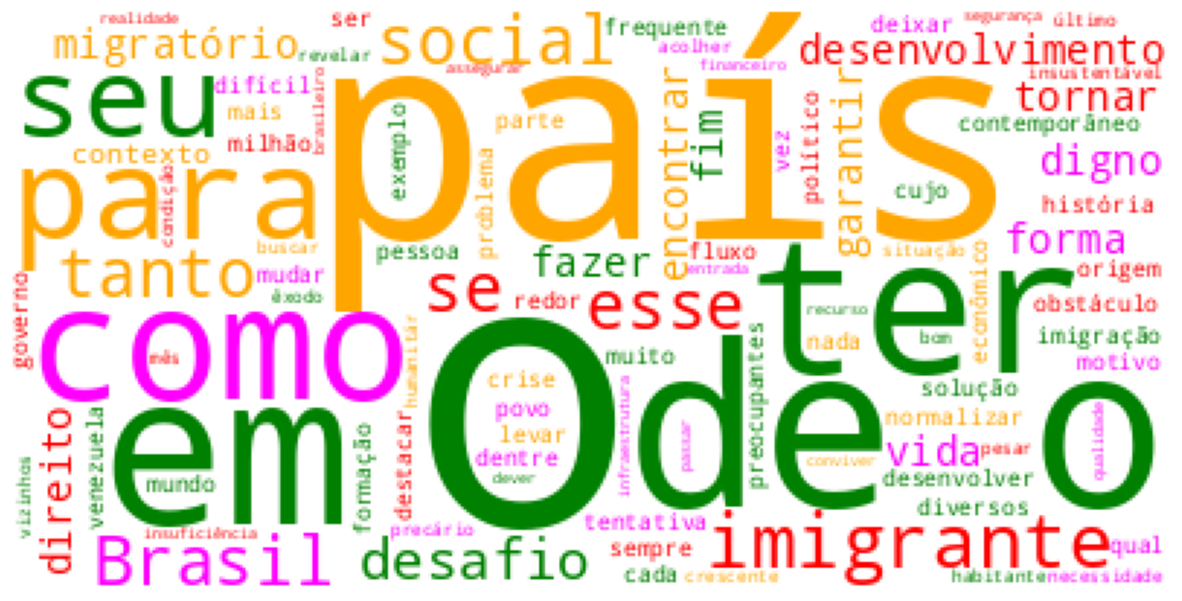

In [131]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(lista_token))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()